In [1]:
import numpy as np
from Utils.GridGraph import GridGraph
from MultiRobotTargetSearch import MultiRobotTargetSearch
from Utils.DTMC_Utils import DTMC_Utils
from tqdm import tqdm

In [2]:
np.random.seed(12345)

In [3]:
reference_information_state = 1
Z_r = [4, 5, 6]

print("The reference information state is: " + str(reference_information_state))
print("Target is observable from nodes: " + str(Z_r))

The reference information state is: 1
Target is observable from nodes: [4, 5, 6]


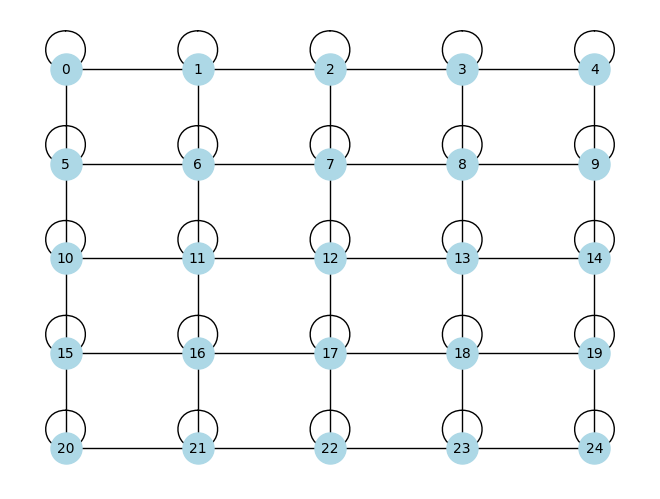

In [4]:
map_width = 5  # (meters)
map_height = 5

S = map_width * map_height  # number of nodes (locations)

grid_graph = GridGraph(map_width, map_height)
grid_graph.plot_graph()

In [5]:
# Configuration
num_of_experiments = 1000
N = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
# N = [6, 7, 8]

# Results storage
average_consensus_time_same_node = []
average_consensus_time_contiguous_node = []
std_dev_same_node = []
std_dev_contiguous_node = []

nodesNumber = grid_graph.getNodesNumber()

# Experiment Loop
for agent_number in N:
    print(f"\nRunning experiments with {agent_number} agents...")
    # alpha = 1 / (agent_number - 1)
    alpha = 0.8
    
    # Temporary lists for each agent count
    consensus_times_same_node = []
    consensus_times_contiguous_node = []

    # Run experiments with progress tracking
    for _ in tqdm(range(num_of_experiments), desc=f"{agent_number} Agents"):
        agents = DTMC_Utils.initAgents(agent_number, nodesNumber)
        initial_positions = [a.getPosition() for a in agents]
        
        # print("same node:")
        # Same node communication
        experiment_same_node = MultiRobotTargetSearch(agents, grid_graph, reference_information_state, Z_r, alpha)
        initial_state = experiment_same_node.getInformationStateVector()
        
        experiment_same_node.run()
        consensus_times_same_node.append(experiment_same_node.getMeanConsensusTime())
        
        for (i, a) in enumerate(agents):
            a.updatePosition(initial_positions[i])
            
        # print("contiguous node:")

        # Contiguous node communication
        experiment_contiguous_node = MultiRobotTargetSearch(agents, grid_graph, reference_information_state, Z_r, alpha, False)
        experiment_contiguous_node.update_agents_information_state(initial_state[:-1])
        
        experiment_contiguous_node.run()
        consensus_times_contiguous_node.append(experiment_contiguous_node.getMeanConsensusTime())
    
    # Calculate and store statistics
    average_consensus_time_same_node.append(np.mean(consensus_times_same_node))
    std_dev_same_node.append(np.std(consensus_times_same_node))
    
    average_consensus_time_contiguous_node.append(np.mean(consensus_times_contiguous_node))
    std_dev_contiguous_node.append(np.std(consensus_times_contiguous_node))


Running experiments with 3 agents...


3 Agents: 100%|██████████| 1000/1000 [00:20<00:00, 49.69it/s]



Running experiments with 4 agents...


4 Agents: 100%|██████████| 1000/1000 [00:18<00:00, 53.76it/s]



Running experiments with 5 agents...


5 Agents: 100%|██████████| 1000/1000 [00:17<00:00, 57.37it/s]



Running experiments with 6 agents...


6 Agents: 100%|██████████| 1000/1000 [00:18<00:00, 54.41it/s]



Running experiments with 7 agents...


7 Agents: 100%|██████████| 1000/1000 [00:20<00:00, 48.54it/s]



Running experiments with 8 agents...


8 Agents: 100%|██████████| 1000/1000 [00:21<00:00, 46.38it/s]



Running experiments with 9 agents...


9 Agents: 100%|██████████| 1000/1000 [00:21<00:00, 46.10it/s]



Running experiments with 10 agents...


10 Agents: 100%|██████████| 1000/1000 [00:21<00:00, 46.33it/s]



Running experiments with 11 agents...


11 Agents: 100%|██████████| 1000/1000 [00:23<00:00, 42.68it/s]



Running experiments with 12 agents...


12 Agents: 100%|██████████| 1000/1000 [00:24<00:00, 41.57it/s]



Running experiments with 13 agents...


13 Agents: 100%|██████████| 1000/1000 [00:29<00:00, 33.82it/s]



Running experiments with 14 agents...


14 Agents: 100%|██████████| 1000/1000 [00:28<00:00, 35.55it/s]


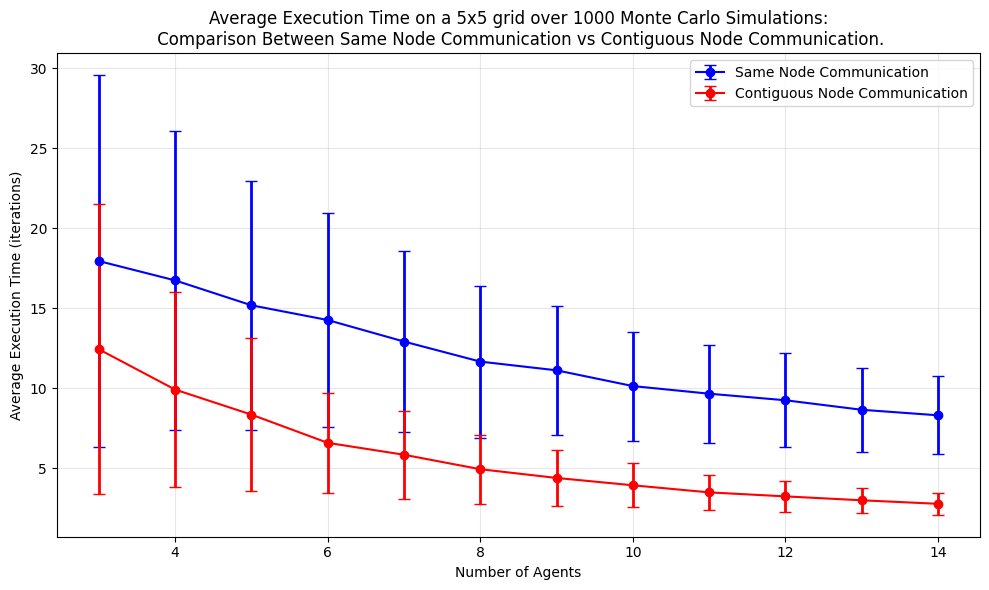

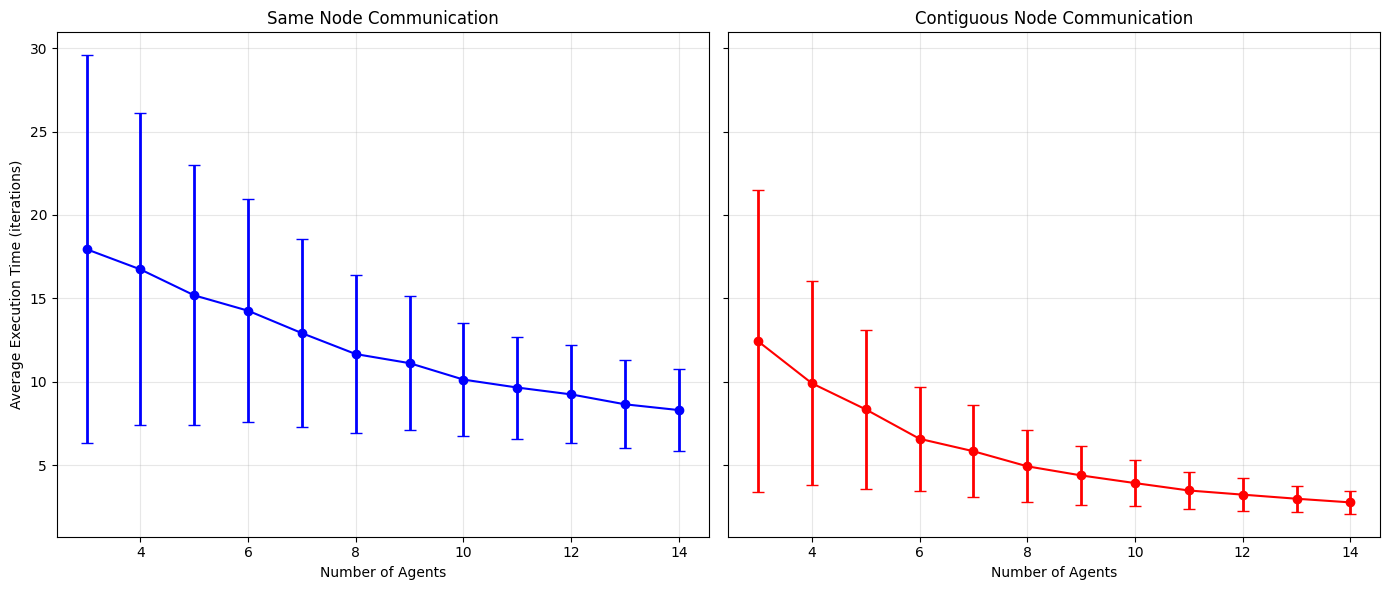

In [6]:
# Plot the results
DTMC_Utils.plot_average_execution_time_comparison(N, 
                            average_consensus_time_same_node, std_dev_same_node,
                            average_consensus_time_contiguous_node, std_dev_contiguous_node, 
                            "Number of Agents")

DTMC_Utils.plot_separate_execution_time_comparison(N, 
                            average_consensus_time_same_node, std_dev_same_node,
                            average_consensus_time_contiguous_node, std_dev_contiguous_node, 
                            "Number of Agents")
